# ROC AUC

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

$$\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

False Positive Rate (FPR) is defined as follows:

$$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

<p align='center'>
    <img src="https://developers.google.com/machine-learning/crash-course/images/ROCCurve.svg"></img>
</p>

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.


AUC: Area Under the ROC Curve
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

<p align='center'>
    <img src="https://developers.google.com/machine-learning/crash-course/images/AUCPredictionsRanked.svg"></img>
</p>

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:
- AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
- AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

However, both these reasons come with caveats, which may limit the usefulness of AUC in certain use cases:

- Scale invariance is not always desirable. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.

- Classification-threshold invariance is not always desirable. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.



Welcome to install our package. The entire package is written in python. One can use the following code to install this Github package.


In [1]:
!pip install git+https://github.com/yiqiao-yin/WYNAssociates.git # in jupyter notebook

  Cloning https://github.com/yiqiao-yin/WYNAssociates.git to /tmp/pip-req-build-2lort1vk
  Running command git clone -q https://github.com/yiqiao-yin/WYNAssociates.git /tmp/pip-req-build-2lort1vk
  Created wheel for WYNAssociates: filename=WYNAssociates-1.0.0-py3-none-any.whl size=22156 sha256=aa0855975e9e50cbb1bea9627db0d9dd922f1318dbad60c6b0003924d85faf77
  Stored in directory: /tmp/pip-ephem-wheel-cache-6xk_8982/wheels/e7/8d/cb/5eaa7fa9db48dbabd76f0c5e07ad4946ca059ecfaa79e94c49
Successfully built WYNAssociates


In [2]:
# install dependencies
!pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 11.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
# install dependencies
!pip install ta

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=fd12d19fe13af2dc3ac62c948b3037d6e437865e0d9e1994df1a7856f4fb618b
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


### Library

Let us import the functions.

In [4]:
from AI_solution.modules import YinsML

---------------------------------------------------------------------

        Yin's Deep Learning Package 
        Copyright © W.Y.N. Associates, LLC, 2009 – Present
        For more information, please go to https://wyn-associates.com/
        
---------------------------------------------------------------------


In [5]:
# define ground truth
truth = [1, 1, 1, 0, 0, 0]

# define predictor
pred  = [.9, .9, .8, .6, .4, .2]

### Test Run

Notice that the above data are created on purpose in a way that *pred* can guess the *truth* very accurately. 

This means we can find a cutoff, say 0.7, such that we can turn *pred* into a perfectly matching vector to guess *truth* vector. 

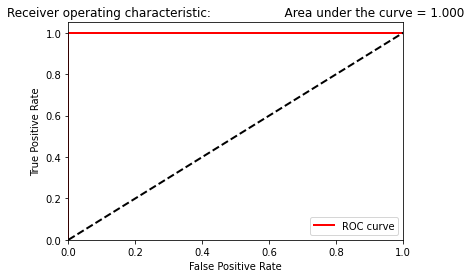

In [6]:
YinsML.ResultAUCROC(y_test=truth, y_test_hat=pred)

### What Separates Two Classes?

Now let us change things a little bit.

In [7]:
from scipy.stats import bernoulli
from scipy.stats import norm

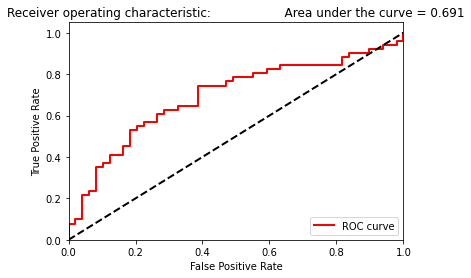

In [8]:
# define truth and predictor
truth = bernoulli.rvs(0.5, size=100)
pred  = truth + norm.rvs(0, 1.5, size=100)

# compute AUC and draw ROC curve
YinsML.ResultAUCROC(y_test=truth, y_test_hat=pred)

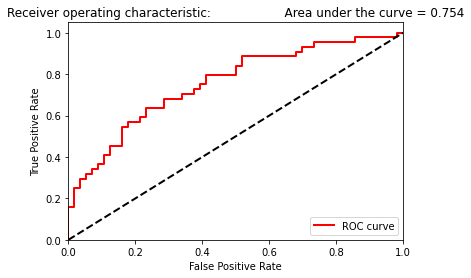

In [9]:
# define truth and predictor
truth = bernoulli.rvs(0.5, size=100)
pred  = truth + norm.rvs(0, 1, size=100) # <= reduce the standard deviation!

# compute AUC and draw ROC curve
YinsML.ResultAUCROC(y_test=truth, y_test_hat=pred)

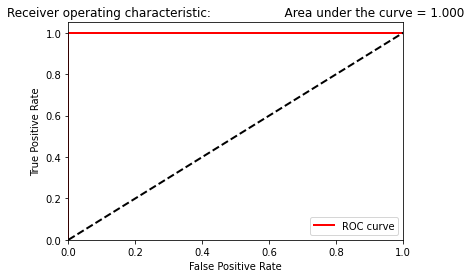

In [10]:
# define truth and predictor
truth = bernoulli.rvs(0.5, size=100)
pred  = truth + norm.rvs(0, .01, size=100) # <= reduce the standard deviation more!

# compute AUC and draw ROC curve
YinsML.ResultAUCROC(y_test=truth, y_test_hat=pred)

Observation: For each generated *truth*, we add *normal distribution* to it to create the *pred*. By changing the numerical value of *standard deviation* of the normal distribution, we can see that AUC gets more and more accurate! 

In [11]:
import numpy as np

In [12]:
# define the truth to be 90% of 1s
truth = bernoulli.rvs(0.9, size=100)

# define the predictor to be only 1s
pred  = np.ones(len(truth))

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_true=truth, y_pred=pred)

array([[ 0,  7],
       [ 0, 93]])

In [13]:
from sklearn.metrics import classification_report
import pandas as pd

In [14]:
print(classification_report(y_true=truth, y_pred=pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.93      1.00      0.96        93

    accuracy                           0.93       100
   macro avg       0.47      0.50      0.48       100
weighted avg       0.86      0.93      0.90       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observe: Since the truth is 90% of the ones and the predictor is 100% of ones, we hit 90% accuracy! We have not learned anything and we just blindly guess ones!

This is, however, very wrong! But how do we tell?

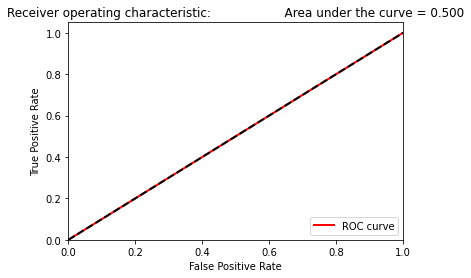

In [15]:
YinsML.ResultAUCROC(y_test=truth, y_test_hat=pred)

AUC would give us 50%, which means random guessing! Hence, AUC is a much more accurate and realistic measurement under imbalanced dataset.